In [52]:
from matplotlib import pylab as plt
import numpy as np
import os
import sys
sys.path.append(os.path.relpath("../src/"))
from dataloader import S3

In [4]:
groups = S3().train_test_groups()

In [16]:
files = list()
for fold in groups:
    for g in fold:
        files.extend(g['train'])

In [24]:
subs = np.unique(np.array(files)[:,0])
# subs = S3().train_subs[0]
vids = np.unique(np.array(files)[:,1])

In [25]:
subs, vids

(array([ 0,  3,  4,  5,  8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23,
        26, 30, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44]),
 array([ 0,  3,  4, 10, 16, 20, 21, 22]))

In [78]:
result = dict.fromkeys(vids)
for vid in vids:
    result[vid] = dict.fromkeys(['valence', 'arousal'])
    fold = 0
    if (vid not in S3().train_vids[0]):
        fold = 1
    for kk, sub in enumerate(subs):
        _, label = S3().train_data(fold, sub, vid)
        if (kk == 0):
            firstValence = len(label.valence)
            result[vid]['valence'] = np.zeros((firstValence, len(subs)))
            result[vid]['arousal'] = np.zeros((len(label.arousal), len(subs)))
        result[vid]['valence'][:len(label.valence), kk] = label.valence[:firstValence]
        result[vid]['arousal'][:len(label.arousal), kk] = label.arousal[:firstValence]

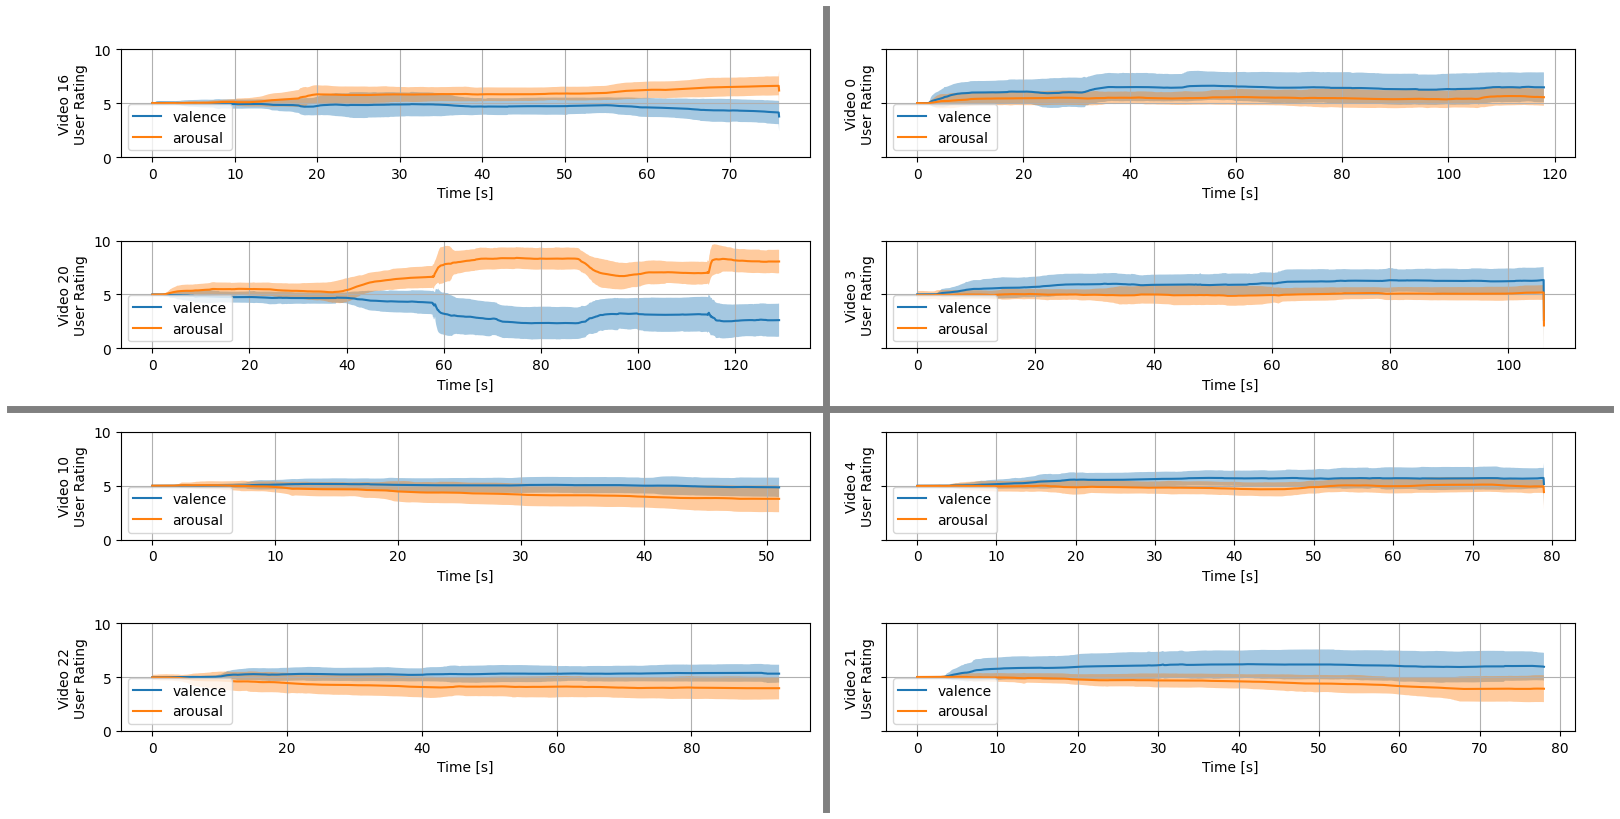

In [168]:
fig, axs = plt.subplots(4,2, sharex=False, sharey=True, figsize=[16,6])
plot_order = [(0, 1), (1, 1), (2, 1), (2, 0), (0, 0), (1, 0), (3, 1), (3, 0)]
for kk, vid in enumerate(result):
    for dimension in result[vid]:
        if ('valence' in dimension):
            color = 'black'
        else:
            color = 'dimgrey'
            
        ax = axs[plot_order[kk]]
#         plt.plot(
#             np.linspace(0, len(result[vid][dimension])//20, len(result[vid][dimension])),
#             result[vid][dimension] / len(subs),
#             label=dimension
#         )
        ax.fill_between(
            np.linspace(0, len(result[vid][dimension].mean(axis=1))//20, len(result[vid][dimension].mean(axis=1))),
            result[vid][dimension].mean(axis=1) - result[vid][dimension].std(axis=1),
            result[vid][dimension].mean(axis=1) + result[vid][dimension].std(axis=1),
            color=color,
            label=dimension,
            alpha=0.4
        )
        ax.plot(
            np.linspace(0, len(result[vid][dimension].mean(axis=1))//20, len(result[vid][dimension].mean(axis=1))),
            result[vid][dimension].mean(axis=1),
            color=color,
        )
    ax.grid()
#     ax.set_title(f'Video {vid}')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(f'Video {vid}\nUser Rating')
    ax.legend(loc='lower left')
    ax.set_ylim([0, 10])

plt.plot(
    np.ones(2)*0.5075,
    [0, 1],
    color='gray', lw=5,
    transform=fig.transFigure, clip_on=False
)
plt.plot(
    [0, 1],
    np.ones(2)*0.5, color='gray', lw=5,
    transform=fig.transFigure, clip_on=False
)
fig.tight_layout(pad=2.5, h_pad=1.05, w_pad=1.02, rect=[-0.02, -0.03, 1.02, 1.03])
plt.savefig('VA.png')